# Tutorial: Machine Learning in scikit-learn
From the [Izaskun Mendia], the GitHub repository (https://github.com/izmendi/)

![Machine learning](images/01_robot.png)

# PANDAS

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np

# Series

In [2]:
index = ['a','b','c','d','e']

In [3]:
series = pd.Series(np.arange(5), index=index)
series

a    0
b    1
c    2
d    3
e    4
dtype: int32

In [4]:
series['a'], series['b']

(0, 1)

In [5]:
series[:2]

a    0
b    1
dtype: int32

In [6]:
series[-2:]

d    3
e    4
dtype: int32

# DataFrame

* Dataframe is dict like, you can index column names or lists of column names
* avoid integer column names
* The first dimension is the index.  Subsequent dimensions are the columns

In [7]:
df = pd.DataFrame({'a' : np.random.random(5), 'number 2' : np.random.random(5)})
print df

          a  number 2
0  0.719753  0.584631
1  0.269622  0.444406
2  0.671336  0.464644
3  0.539403  0.085929
4  0.862720  0.270550


In [8]:
df['a']

0    0.719753
1    0.269622
2    0.671336
3    0.539403
4    0.862720
Name: a, dtype: float64

In [9]:
df.loc[2]

a           0.671336
number 2    0.464644
Name: 2, dtype: float64

In [10]:
df.iloc[2]

a           0.671336
number 2    0.464644
Name: 2, dtype: float64

In [11]:
df.loc[2,['a']]

a    0.671336
Name: 2, dtype: float64

In [12]:
df.ix[:3]

,a,number 2
0,0.719753,0.584631
1,0.269622,0.444406
2,0.671336,0.464644
3,0.539403,0.085929


# Summarize data

To learn more about the frequency strings, please see [this link](http://pandas.pydata.org/pandas-docs/stable/timeseries.html#offset-aliases)

In [13]:
df = pd.DataFrame(np.random.randint(0,100,size=(10, 4)), columns=list('ABCD'))
df.head()

,A,B,C,D
0,86,88,2,55
1,37,29,31,70
2,56,84,27,38
3,28,95,23,34
4,93,1,18,93


In [14]:
df['A'].count()

10

In [15]:
df['A'].min()

2

In [16]:
df['A'].max()

98

In [17]:
df['A'].mean()

55.7

In [18]:
df.min(axis=0)

A     2
B     1
C     2
D    16
dtype: int32

In [19]:
df.min(axis=1)

0     2
1    29
2    27
3    23
4     1
5     2
6    27
7    27
8    16
9    27
dtype: int32

In [20]:
df.isnull().count()

A    10
B    10
C    10
D    10
dtype: int64

**What can we do when we don't have info? **

In [21]:
series = pd.Series([1,2,np.nan,4,np.nan,6,np.nan,8,np.nan,10])
series

0     1.0
1     2.0
2     NaN
3     4.0
4     NaN
5     6.0
6     NaN
7     8.0
8     NaN
9    10.0
dtype: float64

In [22]:
series.isnull()

0    False
1    False
2     True
3    False
4     True
5    False
6     True
7    False
8     True
9    False
dtype: bool

In [23]:
series.fillna(series.mean())

0     1.000000
1     2.000000
2     5.166667
3     4.000000
4     5.166667
5     6.000000
6     5.166667
7     8.000000
8     5.166667
9    10.000000
dtype: float64

In [24]:
series.fillna(series.interpolate())

0     1.0
1     2.0
2     3.0
3     4.0
4     5.0
5     6.0
6     7.0
7     8.0
8     9.0
9    10.0
dtype: float64

In [25]:
series.fillna(method='pad')

0     1.0
1     2.0
2     2.0
3     4.0
4     4.0
5     6.0
6     6.0
7     8.0
8     8.0
9    10.0
dtype: float64

In [26]:
series.dropna()

0     1.0
1     2.0
3     4.0
5     6.0
7     8.0
9    10.0
dtype: float64

**Dataframes and series play nice with plotting**

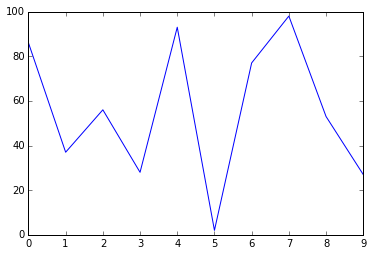

In [27]:
df['A'].plot()

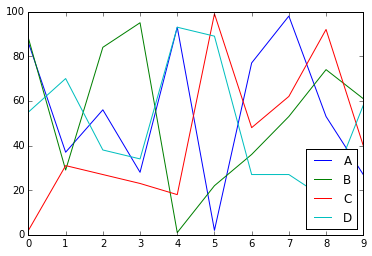

In [28]:
df.plot()

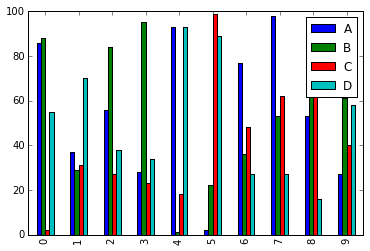

In [29]:
df.plot(kind='bar')

**Generate various summary statistics, excluding NaN values.**

In [30]:
df.describe()

,A,B,C,D
count,10.000000,10.000000,10.00000,10.000000
mean,55.700000,54.300000,44.20000,50.700000
std,32.290521,31.566684,31.66421,26.808166
min,2.000000,1.000000,2.00000,16.000000
25%,30.250000,30.750000,24.00000,28.750000
50%,54.500000,57.000000,35.50000,46.500000
75%,83.750000,81.500000,58.50000,67.000000
max,98.000000,95.000000,99.00000,93.000000
